In [ ]:
!pip install urduhack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 24.1 MB/s eta 0:00:00
  Attempting uninstall: Click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.9.3
    Uninstalling tensorflow-datasets-4.9.3:
      Successfully uninstalled tensorflow-datasets-4.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


89078/89078 [==============================] - 0s 0us/step


In [ ]:
import numpy
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Dropout , Activation
from keras.layers import LSTM , Embedding
from keras.layers import MaxPooling1D , GlobalMaxPooling1D,Conv1D , Flatten
from keras.datasets import imdb
from keras.preprocessing import text

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, Activation, LSTM, GRU, Embedding, Bidirectional, InputLayer

In [ ]:
import pandas as pd

# Define the path to your CSV file
csv_path = '/content/dataTweets.csv'

# Read the CSV file into a Pandas DataFrame with 'utf-8' encoding
df = pd.read_csv(csv_path, encoding='utf-8')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head(3))


First few rows of the dataset:
  Tweet URL  Unnamed: 1                                             Tweets  \
0       NaN         NaN  قراقرم کے پہاڑی سلسلے میں صدیوں تک واخی مویشی ...   
1       NaN         NaN  بڑھتی عمر میں آئی وی ایف کے ذریعے بچہ پیدا کرن...   
2       NaN         NaN  ’بگ باس سب سن رہا ہوتا ہے‘: اسلام آباد ہائیکور...   

  Sentiment  
0     Mixed  
1     Mixed  
2     Mixed  


In [ ]:
# Remove the first two columns from the DataFrame
df = df.drop(df.columns[:2], axis=1)

# Display the first few rows of the updated dataset
print("First few rows of the updated dataset:")
print(df.head())

First few rows of the updated dataset:
                                              Tweets Sentiment
0  قراقرم کے پہاڑی سلسلے میں صدیوں تک واخی مویشی ...     Mixed
1  بڑھتی عمر میں آئی وی ایف کے ذریعے بچہ پیدا کرن...     Mixed
2  ’بگ باس سب سن رہا ہوتا ہے‘: اسلام آباد ہائیکور...     Mixed
3  1۔ حق مہر کی ادائیگی میں تاخیر پر شوہر کو ایک ...     Mixed
4  پاکستان میں مقیم افغان ہزارہ: ’طالبان ہمیں مسل...     Mixed


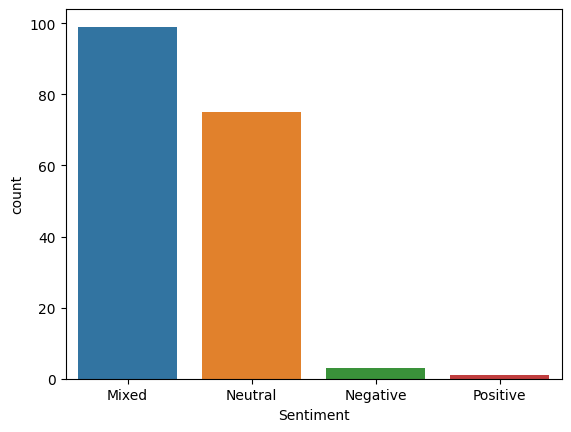

In [ ]:
sns.countplot( x = 'Sentiment', data = df );

In [ ]:
# Encode the labels
le = LabelEncoder()
le.fit(df['Sentiment'])
df['encoded_sentiments'] = le.transform(df['Sentiment'])

In [ ]:
df

,Tweets,Sentiment,encoded_sentiments
0,قراقرم پہاڑی سلسلے صدیوں واخی مویشی بان راج مو...,Mixed,0
1,بڑھتی عمر وی ایف بچہ پیدا مشکلات سامنا پڑ,Mixed,0
2,بگ باس سن اسلام آباد ہائیکورٹ مبینہ آڈیو لیکس ...,Mixed,0
3,حق مہر ادائیگی تاخیر شوہر لاکھ روپے جرمانہ ادا...,Mixed,0
4,پاکستان مقیم افغان ہزارہ طالبان مسلمان سمجھتے ...,Mixed,0
...,...,...,...
173,عمران خان جیل محفوظ سنگین الزامات لگانے دس سوچ...,Neutral,2
174,مسئلہ روہت شرما قسمت سمیع چوہدری کالم,Neutral,2
175,کرکٹ ورلڈ کپ آسٹریلیا انڈیا چھ وکٹوں شکست چھٹی...,Neutral,2
176,اکیسویں صدی زمانہ بدل جرنیل چاہیں ہیرو چاہیں ہ...,Neutral,2


In [ ]:
# Assuming df is your DataFrame
df = df.drop('Sentiment', axis=1)

In [ ]:
df

,Tweets,encoded_sentiments
0,قراقرم پہاڑی سلسلے صدیوں واخی مویشی بان راج مو...,0
1,بڑھتی عمر وی ایف بچہ پیدا مشکلات سامنا پڑ,0
2,بگ باس سن اسلام آباد ہائیکورٹ مبینہ آڈیو لیکس ...,0
3,حق مہر ادائیگی تاخیر شوہر لاکھ روپے جرمانہ ادا...,0
4,پاکستان مقیم افغان ہزارہ طالبان مسلمان سمجھتے ...,0
...,...,...
173,عمران خان جیل محفوظ سنگین الزامات لگانے دس سوچ...,2
174,مسئلہ روہت شرما قسمت سمیع چوہدری کالم,2
175,کرکٹ ورلڈ کپ آسٹریلیا انڈیا چھ وکٹوں شکست چھٹی...,2
176,اکیسویں صدی زمانہ بدل جرنیل چاہیں ہیرو چاہیں ہ...,2


In [ ]:
df.shape

(223, 3)

In [ ]:
!pip install demoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.1 MB/s eta 0:00:00


In [ ]:
from prettytable import PrettyTable
from collections import Counter

import urduhack
urduhack.download()
from urduhack.preprocessing import replace_urls
from urduhack.preprocessing import replace_numbers
from urduhack.preprocessing import remove_punctuation
from urduhack.preprocessing import remove_accents
from urduhack.preprocessing import remove_english_alphabets
from urduhack.preprocessing import normalize_whitespace
from urduhack.models.lemmatizer import lemmatizer
from urduhack.normalization import normalize

import demoji

In [ ]:
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import demoji
import re

#Normalise the data

def cl_c(com):
    if isinstance(com, str):
        com = demoji.replace(com, "")
        com = re.sub(r'@[A-Za-z0-9]+', '', com)
        com = re.sub(r'#[A-Za-z0-9]*', '', com)
        com = replace_urls(com, replace_with="")
        com = replace_numbers(com, replace_with="")
        com = remove_accents(com)
        com = remove_english_alphabets(com)
        com = normalize_whitespace(com)
        com = remove_punctuation(com)
        com = normalize(com)
        com = re.sub(r'\+', '', com)
        com = re.sub(r'\=', '', com)
    return com


for i in df.index:
    a = df['Tweets'][i]
    b = cl_c(a)
    df.loc[i, 'Tweets'] = b

# Display the updated DataFrame
print(df)


Index(['Tweets', 'encoded_sentiments'], dtype='object')
                                                Tweets  encoded_sentiments
0    قراقرم پہاڑی سلسلے صدیوں واخی مویشی بان راج مو...                   0
1            بڑھتی عمر وی ایف بچہ پیدا مشکلات سامنا پڑ                   0
2    بگ باس سن اسلام آباد ہائیکورٹ مبینہ آڈیو لیکس ...                   0
3    حق مہر ادائیگی تاخیر شوہر لاکھ روپے جرمانہ ادا...                   0
4    پاکستان مقیم افغان ہزارہ طالبان مسلمان سمجھتے ...                   0
..                                                 ...                 ...
173  عمران خان جیل محفوظ سنگین الزامات لگانے دس سوچ...                   2
174              مسئلہ روہت شرما قسمت سمیع چوہدری کالم                   2
175  کرکٹ ورلڈ کپ آسٹریلیا انڈیا چھ وکٹوں شکست چھٹی...                   2
176  اکیسویں صدی زمانہ بدل جرنیل چاہیں ہیرو چاہیں ہ...                   2
177  شخص آزاد فلسطین ٹی شرٹ پہن پچ وراٹ کوہلی قریب ...                   0

[178 rows x 2 columns]


In [ ]:
stop_words = set("""

 آ آئی آئیں آئے آتا آتی آتے آداب آدھ آدھا آدھی آدھے آس آمدید آنا آنسہ آنی آنے
 آپ آگے آہ آہا آیا اب ابھی ابے اتوار ارب اربویں ارے اس اسکا اسکی اسکے اسی اسے اف
 افوہ الاول البتہ الثانی الحرام السلام الف المکرم ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور
 اوپر اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکبر اکثر اگر اگرچہ اگست اہاہا ایسا ایسی ایسے ایک بائیں
 بار بارے بالکل باوجود باہر بج بجے بخیر برسات بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند
 بڑی بھر بھریں بھی بہار بہت بہتر بیگم تاکہ تاہم تب تجھ تجھی تجھے ترا تری تلک تم تمام
 تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تہائی تیرا تیری تیرے تین جا جاؤ
 جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی
 جیسا جیسوں جیسی جیسے جیٹھ حالانکہ حالاں حصہ حضرت خاطر خالی خدا خزاں خواہ خوب خود دائیں درمیان
 دریں دو دوران دوسرا دوسروں دوسری دوشنبہ دوں دکھائیں دگنا دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی
 دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی رکھنے رکھو رکھی رکھے رہ رہا
 رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی سراسر سلام سمیت سوا
 سوائے سکا سکتا سکتے سہ سہی سی سے شام شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور
 علاوہ عین فروری فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو
 لوجی لوگوں لگ لگا لگتا لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے
 لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محترمی محض مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق
 مطلق مل منٹ منٹوں مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک نما نو نومبر
 نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وعلیکم وغیرہ ولے
 وگرنہ وہ وہاں وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونا پونی پونے پھاگن
 پھر پہ پہر پہلا پہلی پہلے پیر پیچھے چاہئے چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ
 چوگنی چکی چکیں چکے چہارشنبہ چیت ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاتک کاش کب کبھی کدھر کر
 کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کل کم کن کنہیں کو کوئی کون
 کونسا کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے
 کے گئی گئے گا گرما گرمی گنا گو گویا گھنٹا گھنٹوں گھنٹے گی گیا ہائیں ہائے ہاڑ ہاں ہر
 ہرچند ہرگز ہزار ہفتہ ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا ہوبہو ہوتا ہوتی
 ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں


""".split())



In [ ]:
df.head(5)

,Tweets,encoded_sentiments
0,قراقرم پہاڑی سلسلے صدیوں واخی مویشی بان راج مو...,0
1,بڑھتی عمر وی ایف بچہ پیدا مشکلات سامنا پڑ,0
2,بگ باس سن اسلام آباد ہائیکورٹ مبینہ آڈیو لیکس ...,0
3,حق مہر ادائیگی تاخیر شوہر لاکھ روپے جرمانہ ادا...,0
4,پاکستان مقیم افغان ہزارہ طالبان مسلمان سمجھتے ...,0


In [ ]:
def rem_stew(text):
    if isinstance(text, str):
        filterwor = [word for word in text.split() if word not in stop_words]
        return " ".join(filterwor)
    else:
        return ""


In [ ]:
df["Tweets"] = df.Tweets.map(rem_stew)

In [ ]:
def lS(text):              #lemitizeStr
    L_tex = ""
    temp = lS.lemma_lookup(text)
    for t in temp:
        L_tex += t[0] + " "

    return L_tex

In [ ]:
df["Tweets"] = df.Tweets.map(lS)

In [ ]:
# Mixed = 0
#Negative = 1
#Neutral =2
#Positive = 3
df.head(5)

,Tweets,encoded_sentiments
0,قراقرم پہاڑی سلسلے صدیوں واخی مویشی بان راج مو...,0
1,بڑھتی عمر وی ایف بچہ پیدا مشکلات سامنا پڑ,0
2,بگ باس سن اسلام آباد ہائیکورٹ مبینہ آڈیو لیکس ...,0
3,حق مہر ادائیگی تاخیر شوہر لاکھ روپے جرمانہ ادا...,0
4,پاکستان مقیم افغان ہزارہ طالبان مسلمان سمجھتے ...,0


In [ ]:
# Drop rows with NaN values in the "Tweets" column
df.dropna(subset=['Tweets'], inplace=True)

# Apply the remove_stopwords function to the "Tweets" column
df["Tweets"] = df["Tweets"].map(rem_stew)


In [ ]:
target_mixed = df[df['Sentiment'] == 'Mixed']
print("Dataset records having target label Mixed': %d"%(len(target_mixed )))

target_positive = df[df['Sentiment'] == 'Positive']
print("Dataset records having target label Positive': %d"%(len(target_positive )))

target_neutral = df[df['Sentiment'] == 'Neutral']
print("Dataset records having target label Neutral': %d"%(len(target_neutral )))

target_negative = df[df['Sentiment'] == 'Negative']
print("Dataset records having target label Negative': %d"%(len(target_negative )))

Dataset records having target label Mixed': 99
Dataset records having target label Positive': 1
Dataset records having target label Neutral': 75
Dataset records having target label Negative': 3


In [ ]:
#Define feature and target value
X = df.iloc[:,0]
y = df.iloc[:,1]

In [ ]:
#Split the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
X_train.shape, y_train.shape

((133,), (133,))

In [ ]:
# Count unique words
def counter_word(text_col):
    co = Counter()
    for text in text_col.values:
        for word in text.split():
            co[word] += 1
    return co

In [ ]:
cont = counter_word(df.Tweets)

In [ ]:
uniqword = len(cont)
uniqword

1543

In [ ]:
cont

Counter({'قراقرم': 3,
         'پہاڑی': 2,
         'سلسلے': 2,
         'صدیوں': 2,
         'واخی': 2,
         'مویشی': 6,
         'بان': 5,
         'راج': 3,
         'خواتین': 9,
         'سال': 9,
         'ہزاروں': 2,
         'فٹ': 2,
         'بلندی': 2,
         'سفر': 5,
         'کمیونٹی': 2,
         'قسمت': 3,
         'بدل': 3,
         'بی': 21,
         'ٹیم': 6,
         'خصوصی': 4,
         'ڈاکیومینٹری': 2,
         'پروڈیوسر': 1,
         'ڈائریکٹر': 1,
         'فرحت': 1,
         'جاوید': 2,
         'بڑھتی': 2,
         'عمر': 9,
         'وی': 3,
         'ایف': 5,
         'بچہ': 3,
         'پیدا': 3,
         'مشکلات': 4,
         'سامنا': 3,
         'پڑ': 2,
         'بگ': 1,
         'باس': 1,
         'سن': 3,
         'اسلام': 8,
         'آباد': 7,
         'ہائیکورٹ': 5,
         'مبینہ': 2,
         'آڈیو': 1,
         'لیکس': 1,
         'کاپی': 1,
         'ڈی': 2,
         'ایس': 2,
         'بھیجنے': 2,
         'اے': 5,
         'فرانزک': 1,
 

In [ ]:
# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=uniqword)
tokenizer.fit_on_texts(X_train) # fit only to training

In [ ]:
# each word has unique index
word_index = tokenizer.word_index
word_index

{'پاکستان': 1,
 'بی': 2,
 'خان': 3,
 'انصاف': 4,
 'عمران': 5,
 'تحریک': 6,
 'کیس': 7,
 'سپریم': 8,
 'خلاف': 9,
 'سماعت': 10,
 'عمر': 11,
 'پی': 12,
 'ٹی': 13,
 'زیادہ': 14,
 'فیصلہ': 15,
 'الیکشن': 16,
 'آج': 17,
 'جاری': 18,
 'چیئرمین': 19,
 'سال': 20,
 'ملک': 21,
 'نام': 22,
 'غیر': 23,
 'انڈیا': 24,
 'کورٹ': 25,
 'روپے': 26,
 'جیل': 27,
 'قتل': 28,
 'اسلام': 29,
 'حکم': 30,
 'اسرائیل': 31,
 'جنگ': 32,
 'خواتین': 33,
 'سابق': 34,
 'انتخابات': 35,
 'گے': 36,
 'عدالت': 37,
 'کمیشن': 38,
 'وقت': 39,
 'پیش': 40,
 'نواز': 41,
 'شریف': 42,
 'فلسطینی': 43,
 'امریکی': 44,
 'متعلق': 45,
 'درخواست': 46,
 'لڑکی': 47,
 'موت': 48,
 'کرکٹ': 49,
 'گھر': 50,
 'بے': 51,
 'پاکستانی': 52,
 'افغانستان': 53,
 'جوڈیشل': 54,
 'سائفر': 55,
 'سفر': 56,
 'نظر': 57,
 'ادا': 58,
 'کام': 59,
 'استعمال': 60,
 'علی': 61,
 'دنیا': 62,
 'رہنما': 63,
 'مقدمے': 64,
 'آباد': 65,
 'ہائیکورٹ': 66,
 'ایف': 67,
 'اے': 68,
 'العزیزیہ': 69,
 'حماس': 70,
 'کھڑے': 71,
 'شخص': 72,
 'لاکھ': 73,
 'ڈالر': 74,
 'ویڈیو': 75,
 'قرار'

In [ ]:
len(word_index)

1276

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Max number of words in a sequence
max_length = 20
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding="post")
X_train_padded.shape, X_test_padded.shape

((133, 20), (45, 20))

In [ ]:
X_train.iloc[10]

'جنرل باجوہ فیض حمید خلاف اندراج مقدمہ درخواست ہائیکورٹ کازلسٹ منسوخ'

In [ ]:
X_train_seq[10]

[116, 472, 473, 474, 9, 475, 78, 46, 66, 476, 202]

In [ ]:
models           = []
accuracy_scores  = []
precision_scores = []
recall_scores    = []
f1_scores        = []

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dropout, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Assuming you have the necessary data and parameters defined

model = Sequential()
model.add(Embedding(uniqword, 150, input_length=max_length))
model.add(SimpleRNN(200, return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(200))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 150)           231450    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 20, 200)           70200     
                                                                 
 dropout_2 (Dropout)         (None, 20, 200)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 200)               80200     
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 382051 (1.46 MB)
Trainable params: 38205

In [ ]:
loss = 'binary_crossentropy'
optimizer = 'adam'
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_padded, y_train, batch_size=42, epochs=50, verbose=2)

# Access training loss and accuracy from the history object
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']


Epoch 1/50
4/4 - 0s - loss: -3.3394e+01 - accuracy: 0.5564 - 137ms/epoch - 34ms/step
Epoch 2/50
4/4 - 0s - loss: -3.3455e+01 - accuracy: 0.5564 - 184ms/epoch - 46ms/step
Epoch 3/50
4/4 - 0s - loss: -3.3646e+01 - accuracy: 0.5564 - 152ms/epoch - 38ms/step
Epoch 4/50
4/4 - 0s - loss: -3.4416e+01 - accuracy: 0.5564 - 153ms/epoch - 38ms/step
Epoch 5/50
4/4 - 0s - loss: -3.4511e+01 - accuracy: 0.5564 - 145ms/epoch - 36ms/step
Epoch 6/50
4/4 - 0s - loss: -3.4878e+01 - accuracy: 0.5564 - 157ms/epoch - 39ms/step
Epoch 7/50
4/4 - 0s - loss: -3.4929e+01 - accuracy: 0.5564 - 148ms/epoch - 37ms/step
Epoch 8/50
4/4 - 0s - loss: -3.4965e+01 - accuracy: 0.5564 - 134ms/epoch - 34ms/step
Epoch 9/50
4/4 - 0s - loss: -3.6047e+01 - accuracy: 0.5564 - 145ms/epoch - 36ms/step
Epoch 10/50
4/4 - 0s - loss: -3.6228e+01 - accuracy: 0.5564 - 155ms/epoch - 39ms/step
Epoch 11/50
4/4 - 0s - loss: -3.6456e+01 - accuracy: 0.5564 - 144ms/epoch - 36ms/step
Epoch 12/50
4/4 - 0s - loss: -3.6417e+01 - accuracy: 0.5564 - 1

In [ ]:
# Fit the model and save the training history
history = model.fit(X_train_padded, y_train, batch_size=42, epochs=50, verbose=2, validation_data=(X_test_padded, y_test))


Epoch 1/50
4/4 - 0s - loss: -5.0329e+01 - accuracy: 0.5564 - val_loss: 45.1294 - val_accuracy: 0.3556 - 316ms/epoch - 79ms/step
Epoch 2/50
4/4 - 0s - loss: -5.0391e+01 - accuracy: 0.5564 - val_loss: 45.4442 - val_accuracy: 0.3556 - 255ms/epoch - 64ms/step
Epoch 3/50
4/4 - 0s - loss: -5.0721e+01 - accuracy: 0.5564 - val_loss: 45.7579 - val_accuracy: 0.3556 - 205ms/epoch - 51ms/step
Epoch 4/50
4/4 - 0s - loss: -5.0692e+01 - accuracy: 0.5564 - val_loss: 46.0741 - val_accuracy: 0.3556 - 229ms/epoch - 57ms/step
Epoch 5/50
4/4 - 0s - loss: -5.1290e+01 - accuracy: 0.5564 - val_loss: 46.3965 - val_accuracy: 0.3556 - 199ms/epoch - 50ms/step
Epoch 6/50
4/4 - 0s - loss: -5.1522e+01 - accuracy: 0.5564 - val_loss: 46.7142 - val_accuracy: 0.3556 - 190ms/epoch - 48ms/step
Epoch 7/50
4/4 - 0s - loss: -5.2501e+01 - accuracy: 0.5564 - val_loss: 47.0244 - val_accuracy: 0.3556 - 186ms/epoch - 46ms/step
Epoch 8/50
4/4 - 0s - loss: -5.2319e+01 - accuracy: 0.5564 - val_loss: 47.3105 - val_accuracy: 0.3333 - 

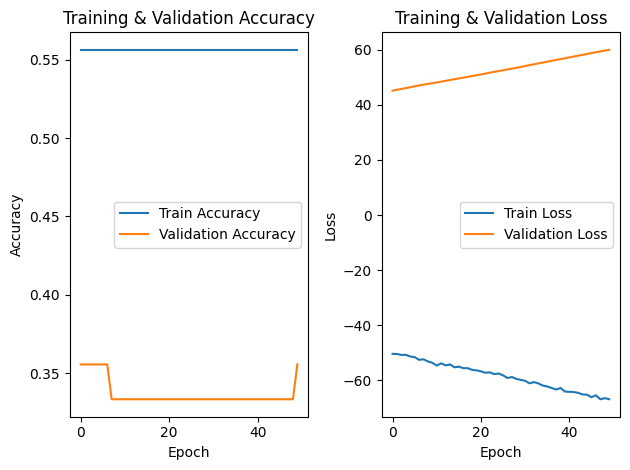

In [ ]:
# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training & Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training & Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()